# **Predicting Heart Disease** <br>
TeYang Lau<br>
Created: 5/5/2020<br>
Last update: 2/6/2020<br>

<img src = './Pictures/heart2.jpg'>

## **Project Goal** ##
1. To **predict** heart disease using different machine learning models and choosing the best performance based on the F1 score.
2. Identify the **important features** that predict heart disease

### **About this dataset** ###
This data is shared courtesy of the Cleveland Heart Disease Database via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). The original dataset contains 76 attributes from 4 studies, but only a subset of 14 from the Cleveland dataset are used by most machine learning practitioners. Thus, we will be using only these 14 features for predicting heart disease.

### **About heart disease** ###
The Singapore Heart Foundation is a good place for more information about cardiovascular diseases. According to them:

* 17 people pass away from cardiovascular disease everyday in Singapore
* Cardiovascular disease accounted for 29.2% (nearly one-third) of all deaths in 2018
* 57.6% of the deaths due to cardiovascular diseases were Males
* There are different kinds of heart conditions, such as myocardial infarction (heart attack), stroke, congestive heart failure, arrhythmias, just to name a few
* Risk of getting heart diseases include sex, family history, blood pressure, drinking and smoking history, cholesterol levels etc.
* Treatments are expensive, and can include non-invasive (medications) or invasive (device implantation, heart transplantation) 
* Detected early, heart diseases can be managed and thus reduce treatment costs and improve the well-being of the patient

With the data available by healthcare providers, machine learning models can be used to help identify people who are at risk of heart diseases and start interventions early. Early detection not only save lives, but reduces the need for intensive healthcare treatments, and improves the lives of people who are at risk.



### What's in this notebook:
1. [Data Loading and Cleaning](#Data_loading)
2. [Exploratory Data Analysis](#EDA)
3. [Final Cleaning](#Final_cleaning)
4. [Data Wrangling](#Wrangling)<br>
    4.1. [Binarize categorical features](#Binarize)<br>
    4.2. [Features scaling](#Scaling)<br>
    4.3. [Label encoding](#Encoding)<br>
5. [Logistic Regression](#Logistic_Regression)
6. [Decision Tree](#Decision_Tree)
7. [Ensemble Models](#Ensemble)<br>
    7.1. [Bagging](#Bagging)<br>
    7.2. [Random Forest](#Forest)<br>
    7.3. [Gradient Boosting](#Boost)<br>
8. [Model Comparison](#Compare)
9. [Conclusion](#Conclusion)


<a id='Data_loading'></a>
## **1. Data Loading and Cleaning** ##

In [87]:
import numpy as np 
import pandas as pd 
import scipy as sp
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv("./Data/processed.cleveland.csv")
heart.info()
heart.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


(303, 14)

In [88]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
np.sum(heart == '?')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

We will need to deal with those question marks.

In [90]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Features Description

1. **Age**: displays the age of the individual.
2. **Sex**: displays the gender of the individual using the following format :

    1 = male, 0 = female

3. **Chest-pain type (cp)**: displays the type of chest-pain experienced by the individual using the following format :

    1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic

4. **Resting Blood Pressure (trestbps)**: displays the resting blood pressure value of an individual in mmHg (unit)
5. **Serum Cholestrol (chol)**: displays the serum cholesterol in mg/dl (unit)
6. **Fasting Blood Sugar (fbs)**: compares the fasting blood sugar value of an individual with 120mg/dl.

    If fasting blood sugar > 120mg/dl then : 1 (true), else : 0 (false)
7. **Resting ECG (restecg)**: displays resting electrocardiographic results

    0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy

8. **Max heart rate achieved (thalch)**: displays the max heart rate achieved by an individual.
9. **Exercise induced angina (exang)**:

    0 = no

10. **ST depression induced by exercise relative to rest (old peak)**: displays the amount of depression.
11. **Peak exercise ST segment (slope)**:

    1 = upsloping, 2 = flat, 3 = downsloping

12. **Number of major vessels (0–3) colored by flourosopy (ca)**: displays the number of major vessels colored by flourosopy.
13. **Thalassemia (thal)**: displays the thalassemia, which is an inherited blood disorder that causes your body to have less hemoglobin than normal:

    3 = normal, 6 = fixed defect, 7 = reversible defect

14. **Diagnosis of heart disease (target)**: Displays whether the individual is suffering from heart disease or not :

    0 = absence, 1, 2, 3, 4 = present.


The [ST Segment](https://litfl.com/st-segment-ecg-library/) represents the interval within the ECG (electrocardiography) between ventricular depolarization and repolarization. When it is abnormally low compared to the baseline (ST-depression), it is a sign of myocardial ischemia. ST depression is usually determined with a treadmill ECG stress test. In this case, a horizontal (flat) or downward slope in the ST segment is a sign of abnormality. Below is an image of the ECG segment:
<br><br>


<img src = './Pictures/ST.jpg' width='500'>



In [91]:
# rename columns
heart.columns = ['age', 'sex', 'chest_pain_type', 'rest_BP', 'cholesterol', 'fast_blood_sugar', 'rest_ECG', 'max_HR', 'ex_induced_angina', 
               'ST_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [92]:
# label the levels of categorical features

heart['sex'] = ['Male' if s else 'Female' for s in heart['sex']] # label sex columns
heart['target'] = ['No Heart Disease' if t == 0 else 'Heart Disease' for t in heart['target']] # change target to binary
heart['chest_pain_type'] = heart['chest_pain_type'].astype('category').cat.rename_categories(['asymptomatic', 'typical angina','atypical angina', 'anginanon-anginal'])
heart['fast_blood_sugar'] = heart['fast_blood_sugar'].astype('category').cat.rename_categories(['lower than 120mg/dl', 'higher than 120mg/dl'])
heart['rest_ECG'] = heart['rest_ECG'].astype('category').cat.rename_categories(['left ventricular hypertrophy', 'normal', 'ST-T wave abnormality'])
heart['ex_induced_angina'] = heart['ex_induced_angina'].astype('category').cat.rename_categories(['no', 'yes'])
heart['st_slope'] = heart['st_slope'].astype('category').cat.rename_categories(['downslope', 'flat', 'upslope'])
# replace '?' in num_major_vessels with median
heart.num_major_vessels = heart.num_major_vessels.replace('?', None)
heart.num_major_vessels = heart.num_major_vessels.replace('None', heart['num_major_vessels'].median())
heart['num_major_vessels'] = heart['num_major_vessels'].astype('category').cat.rename_categories(['0', '1', '2', '3'])
# replace '?' in thalassemia with median
heart.thalassemia = heart.thalassemia.replace('?', None)
heart.thalassemia = heart.thalassemia.replace('None', heart['thalassemia'].median())
heart['thalassemia'] = heart['thalassemia'].astype('category').cat.rename_categories(['normal', 'fixed defect', 'reversable defect'])


<a id='EDA'></a>
## **2. Exploratory Data Analysis** ##

In [93]:
heart.head()

,age,sex,chest_pain_type,rest_BP,cholesterol,fast_blood_sugar,rest_ECG,max_HR,ex_induced_angina,ST_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,asymptomatic,145,233,higher than 120mg/dl,ST-T wave abnormality,150,no,2.3,upslope,0,fixed defect,No Heart Disease
1,67,Male,anginanon-anginal,160,286,lower than 120mg/dl,ST-T wave abnormality,108,yes,1.5,flat,3,normal,Heart Disease
2,67,Male,anginanon-anginal,120,229,lower than 120mg/dl,ST-T wave abnormality,129,yes,2.6,flat,2,reversable defect,Heart Disease
3,37,Male,atypical angina,130,250,lower than 120mg/dl,left ventricular hypertrophy,187,no,3.5,upslope,0,normal,No Heart Disease
4,41,Female,typical angina,130,204,lower than 120mg/dl,ST-T wave abnormality,172,no,1.4,downslope,0,normal,No Heart Disease


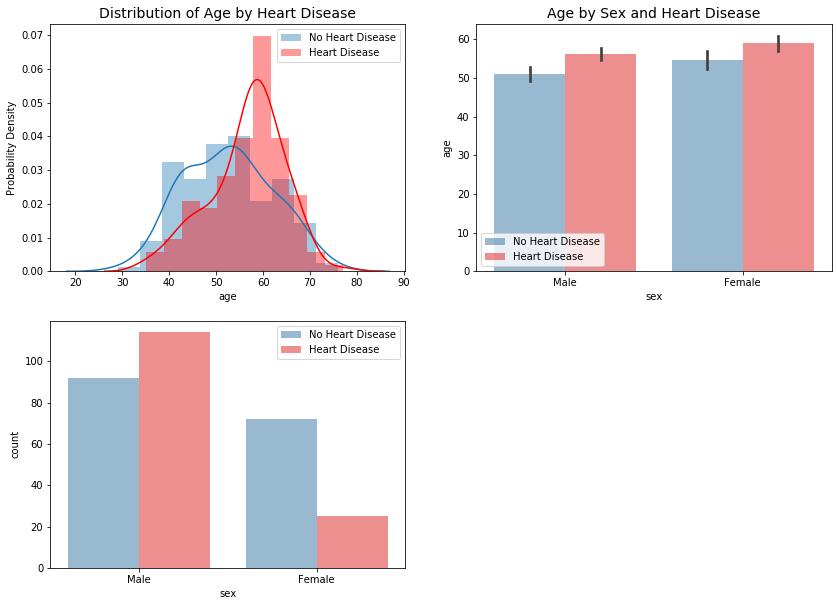

In [94]:
fig = plt.figure(figsize=(14,10))

# Distribution of Age by Heart Disease
ax1 = fig.add_subplot(221)
plt.title('Distribution of Age by Heart Disease', fontsize=14)
sns.distplot(heart[heart['target']=='No Heart Disease'].age, label='No Heart Disease', ax=ax1)
sns.distplot(heart[heart['target']=='Heart Disease'].age, label='Heart Disease', color='red', ax=ax1)
plt.ylabel('Probability Density')
plt.legend()

# Age by Sex and Heart Disease
ax2 = fig.add_subplot(222)
plt.title('Age by Sex and Heart Disease', fontsize=14)
sns.catplot(x='sex', y='age', data=heart, hue='target', palette={'No Heart Disease':'tab:blue','Heart Disease':'red'}, alpha=.5, kind='bar', ax=ax2)
handles, labels = ax2.get_legend_handles_labels() # get the handles of subplot
ax2.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'])

# Frequency of Heart Disease by Sex
ax3 = fig.add_subplot(223)
plt.title('Frequency of Heart Disease by Sex', fontsize=14)
sns.countplot(x="sex", hue="target", palette={'No Heart Disease':'tab:blue','Heart Disease':'red'}, alpha=.5, data=heart, ax=ax3)
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
ax3.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'])

plt.close(2)
plt.show()

We can see from the distribution that people with heart disease in the sample tend to be older. Females in the sample are also older, but there are less females than males. This is consistent with [statistics](https://www.health.harvard.edu/heart-health/the-heart-attack-gender-gap) that men have more heart diseases than woman in the same age group.

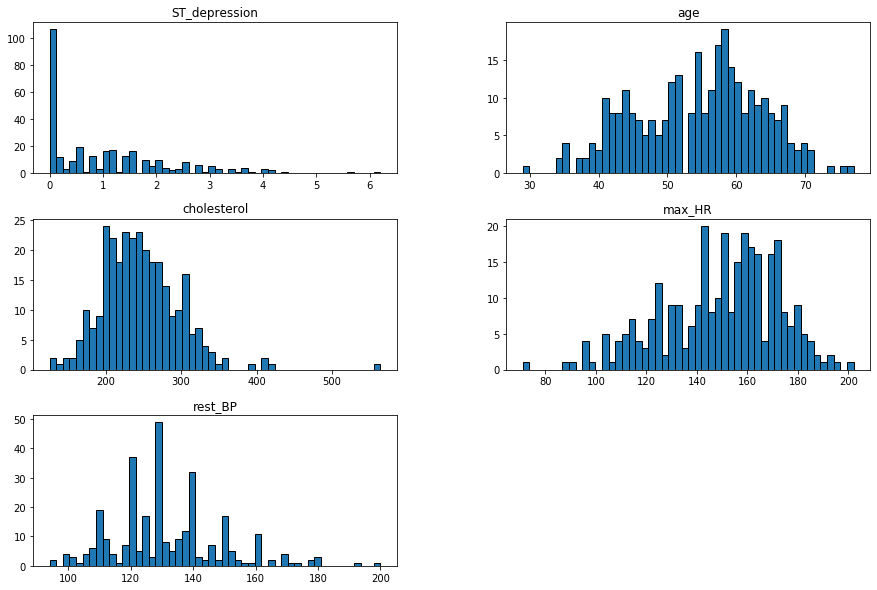

In [95]:
# Plot distribution for each variable
heart.hist(bins=50, figsize=(15, 10), grid=False, edgecolor='black')
plt.show()

In [96]:
heart[heart['cholesterol'] > 500]

,age,sex,chest_pain_type,rest_BP,cholesterol,fast_blood_sugar,rest_ECG,max_HR,ex_induced_angina,ST_depression,st_slope,num_major_vessels,thalassemia,target
152,67,Female,atypical angina,115,564,lower than 120mg/dl,ST-T wave abnormality,160,no,1.6,flat,0,reversable defect,No Heart Disease


ST_depression is highly skewed while cholesterol appears to have an extreme outlier that might need removal.

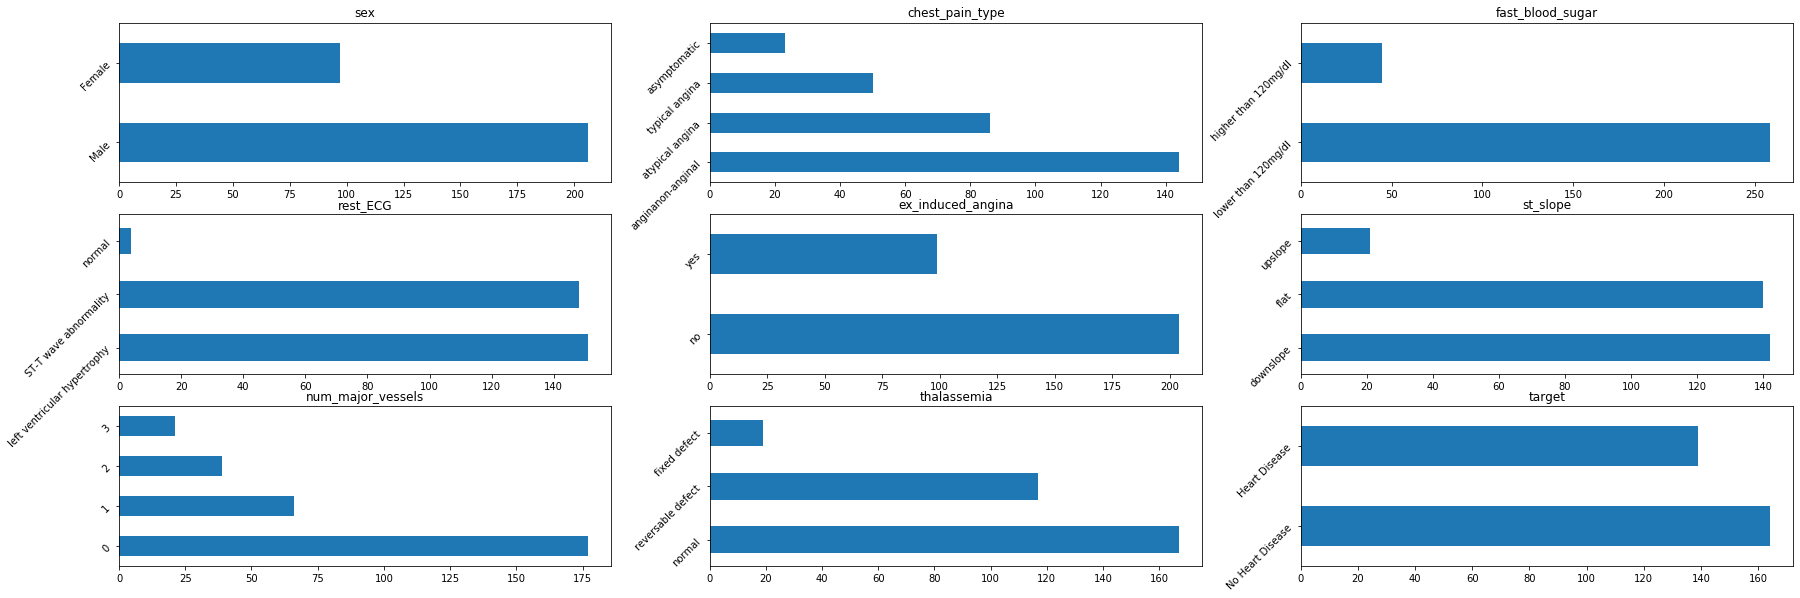

In [97]:
# Frequency plots for catergorical features
fig = plt.figure(figsize=(30,10))
for count, col in enumerate(heart.select_dtypes(include=['category','object']).columns):
    fig.add_subplot(3,3,count+1)
    heart[col].value_counts().plot.barh()
    plt.title(col)
    plt.yticks(rotation=45)

Some levels in a feature are quite unbalanced, such as for fast blood sugar. For other features like number of major vessels, perhaps we can group 1,2,3 into a group that is >0 to make the levels more balanced.

For target, we have slightly imbalanced data and we might want to use F1 score instead of accuracy as the metric for evaluating model performance, although this imbalance is not that drastic.

<a id='Multicollinearity'></a>
### **2.2 Multicollinearity** ###

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Useful link: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

If our goal is one of classification or prediction and not to look at the importance or contribution of each feature, we do not need to deal with multicollinearity as it does not affect the overall prediction or goodness of fit. It just affects the p-value and the coefficients. Since the goal of the project here is to predict heart disease as accurately as possible, we do not need to care about multicollinearity. However, let's just have a look to explore the relationships between our variables.



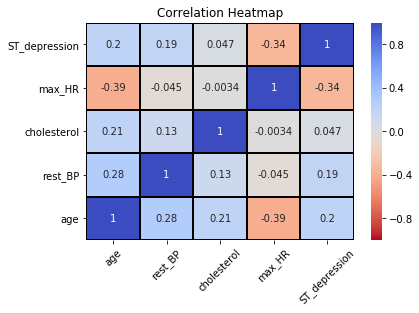

In [98]:
# Correlation heatmap
ax = sns.heatmap(heart.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1)
ax.set_ylim(0 ,5)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
fig.show()

Age is slightly correlated with all variables except max heart rate, which is moderately negatively correlated. People who are older tend to have lower max heart rate. Max heart rate is also negatively correlated with ST_depression. Let's look at their variance inflation factor (VIF) values, tolerance (1/VIF) and mean of VIF.

* If the **largest VIF** is greater than 10 then there is cause for concern (Bowerman & O’Connell, 1990; Myers, 1990)
* If the **average VIF** is substantially greater than 1 then the regression may be biased (Bowerman & O’Connell, 1990).
* **Tolerance** below 0.1 indicates a serious problem.
* **Tolerance** below 0.2 indicates a potential problem (Menard, 1995).


In [99]:
# Multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif(heart.select_dtypes(include=['int64','float64']))



,variables,VIF,tolerance,meanVIF
0,age,36.685632,0.027259,29.684608
1,rest_BP,55.971579,0.017866,29.684608
2,cholesterol,24.354973,0.041059,29.684608
3,max_HR,29.326738,0.034099,29.684608
4,ST_depression,2.084119,0.479819,29.684608


In [100]:
# drop feature with highest VIF
calc_vif(heart.select_dtypes(include=['int64','float64']).drop(['rest_BP'],axis=1))


,variables,VIF,tolerance,meanVIF
0,age,24.663117,0.040546,17.581506
1,cholesterol,23.851692,0.041926,17.581506
2,max_HR,19.841319,0.050400,17.581506
3,ST_depression,1.969897,0.507641,17.581506


There is definitely multicollinearity in our continuous features. Even after removing resting blood pressure, which is the one with the highest VIF value, we still have high VIF values that are way higher than the accepted threshold. Since our goal is one of prediction, we do not need to worry too much about it. However, we should not make any conclusions about the importance/contribution of each feature based on their coefficients when using regression.

Let's further explore their relationship with age while grouping by gender or heart disease diagnosis.

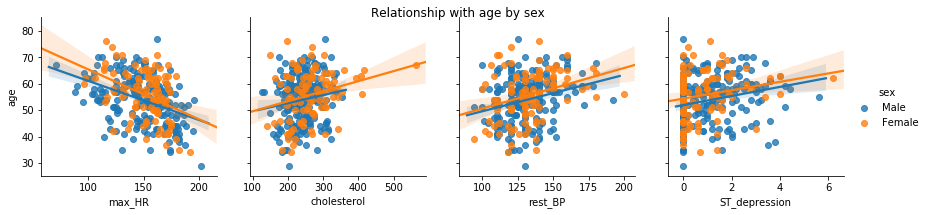

In [101]:
#sns.lmplot(x="age", y="max_HR", hue="sex", data=heart)
sns.pairplot(heart, x_vars=["max_HR", "cholesterol", "rest_BP", "ST_depression"], y_vars=["age"],
             hue="sex", height=3, aspect=1, kind="reg");
plt.suptitle('Relationship with age by sex')
plt.show()

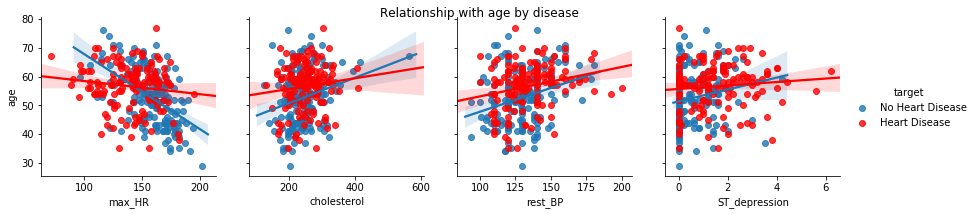

In [102]:
#sns.lmplot(x="age", y="max_HR", hue="sex", data=heart)
sns.pairplot(heart, x_vars=["max_HR", "cholesterol", "rest_BP", "ST_depression"], y_vars=["age"],
             hue="target", palette={'No Heart Disease':'tab:blue','Heart Disease':'red'}, height=3, aspect=1, kind="reg");
plt.suptitle('Relationship with age by disease')
plt.show()

It appears that the relationships between age and max heart rate, cholesterol, resting blood pressure and ST depression are stronger for people with no heart disease. However, for cholesterol, resting blood pressure and ST depression, the relationship difference between heart and no heart disease is smaller compared to max heart rate. None of the scatterplots show a clear separation of disease diagnosis, suggesting that none of these variables by themselves can predict the onset of heart disease.


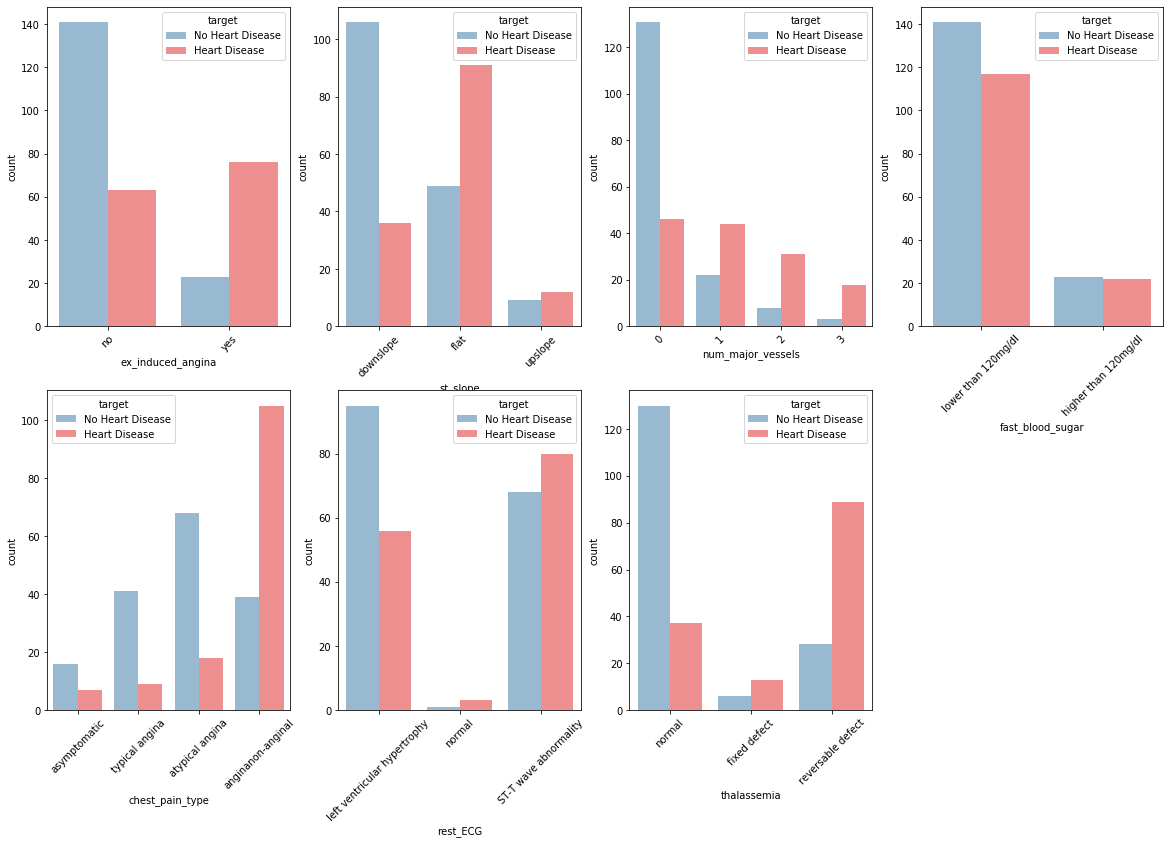

In [103]:
# Frequency by disease and levels of categorical features

fig = plt.figure(figsize=(20,20))
for count, col in enumerate(['ex_induced_angina','st_slope','num_major_vessels', 'fast_blood_sugar', 'chest_pain_type', 'rest_ECG', 'thalassemia']):
    fig.add_subplot(3,4,count+1)
    sns.countplot(x=col, hue="target", palette={'No Heart Disease':'tab:blue','Heart Disease':'red'}, alpha=.5, data=heart)
    plt.xticks(rotation=45)
 

Here, we see that for all the categorical features, all of them have at least a level that differentiates heart disease diagnosis. For example, for the case of type of chest pain, asymptomatic, typical  and atypical angina were all experienced more frequently by people with no heart disease while anginanon-anginal chest pain had a higher occurence among heart disease patients. This gives us confidence that these features will at least be somewhat useful in predicting heart disease, but that remains to be determined by modelling. 

Also, we can actually reduce the number of levels/catergories in each feature to just 2. For example, for chest pain type, since only anginanon-anginal has a higher frequency of heart disease than no heart disease, it can be its own level while the other 3 can be grouped into just 1 level (other types of pain). This removes the need for one-hot encoding, which might lead to further multicollienearity problem. This step is performed under [4.1. Binarize categorical features](#Binarize)

<a id='Final_cleaning'></a>
## **3. Final Cleaning** ##


### Removing outliers using mahalanobis distance ###

Mahalonobis distance is the distance between a point and a distribution. And not between two distinct points. It is effectively a multivariate equivalent of the Euclidean distance and is much better than detecting outliers for each feature individually.

In [104]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = heart.select_dtypes(include=['int64','float64'])
df_x['mahala'] = mahalanobis(x=df_x, data=heart.select_dtypes(include=['int64','float64']))
df_x.head()


,age,rest_BP,cholesterol,max_HR,ST_depression,mahala
0,63,145,233,150,2.3,2.659045
1,67,160,286,108,1.5,6.297799
2,67,120,229,129,2.6,5.045250
3,37,130,250,187,3.5,13.578678
4,41,130,204,172,1.4,3.407108


In [105]:
from scipy.stats import chi2
threshold = chi2.ppf((1-0.001), df=5) # Tabachnick & Fidell (2007) suggest probability estimate of 0.001 to calculate threshold

heart = heart[df_x['mahala'] <= threshold] # remove outliers
df_x[df_x['mahala'] > threshold] # show outliers

,age,rest_BP,cholesterol,max_HR,ST_depression,mahala
91,62,160,164,145,6.2,26.458942
126,56,200,288,133,4.0,20.589917
152,67,115,564,160,1.6,41.984886


We can see that by using mahalanobis distance, the person with extreme cholesterol is highlighted as an outlier together with 2 others. The 1st person has very high ST depression (mean of the sample is ~1) while the 2nd person has very high resting blood pressure (mean of sample is ~ 130) and ST depression. They are removed from subsequent analyses.

In [106]:
heart

,age,sex,chest_pain_type,rest_BP,cholesterol,fast_blood_sugar,rest_ECG,max_HR,ex_induced_angina,ST_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,asymptomatic,145,233,higher than 120mg/dl,ST-T wave abnormality,150,no,2.3,upslope,0,fixed defect,No Heart Disease
1,67,Male,anginanon-anginal,160,286,lower than 120mg/dl,ST-T wave abnormality,108,yes,1.5,flat,3,normal,Heart Disease
2,67,Male,anginanon-anginal,120,229,lower than 120mg/dl,ST-T wave abnormality,129,yes,2.6,flat,2,reversable defect,Heart Disease
3,37,Male,atypical angina,130,250,lower than 120mg/dl,left ventricular hypertrophy,187,no,3.5,upslope,0,normal,No Heart Disease
4,41,Female,typical angina,130,204,lower than 120mg/dl,ST-T wave abnormality,172,no,1.4,downslope,0,normal,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,asymptomatic,110,264,lower than 120mg/dl,left ventricular hypertrophy,132,no,1.2,flat,0,reversable defect,Heart Disease
299,68,Male,anginanon-anginal,144,193,higher than 120mg/dl,left ventricular hypertrophy,141,no,3.4,flat,2,reversable defect,Heart Disease
300,57,Male,anginanon-anginal,130,131,lower than 120mg/dl,left ventricular hypertrophy,115,yes,1.2,flat,1,reversable defect,Heart Disease
301,57,Female,typical angina,130,236,lower than 120mg/dl,ST-T wave abnormality,174,no,0.0,flat,1,normal,Heart Disease


<a id='Wrangling'></a>
## **4. Data Wrangling** ##

<a id='Binarize'></a>
### **4.1. Binarize categorical features** ###

Here we attempt to binarize the levels/categories within each feature. We can do that since most of the levels are higher for either targets (heart disease or no heart disease, refer to [2.2 Multicollinearity](#Multicollinearity)). This eliminates the need for one-hot encoding, which can lead to further multicollinearity problems. 

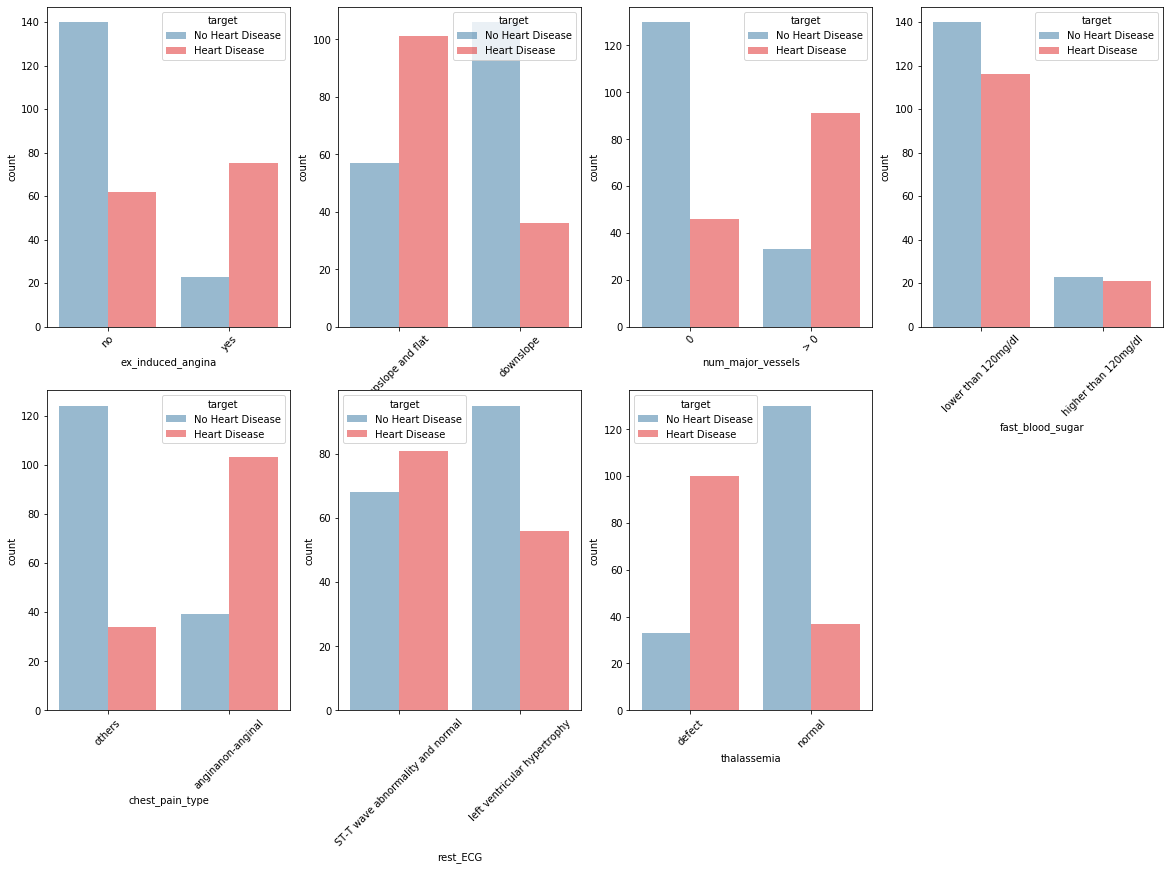

In [107]:
heart.chest_pain_type = ['anginanon-anginal' if i == 'anginanon-anginal' else 'others' for i in heart.chest_pain_type]
heart.rest_ECG = ['left ventricular hypertrophy' if i == 'left ventricular hypertrophy' else 'ST-T wave abnormality and normal' for i in heart.rest_ECG]
heart.st_slope = ['downslope' if i == 'downslope' else 'upslope and flat' for i in heart.st_slope]
heart.num_major_vessels = ['0' if i == '0' else '> 0' for i in heart.num_major_vessels]
heart.thalassemia = ['normal' if i == 'normal' else 'defect' for i in heart.thalassemia]

fig = plt.figure(figsize=(20,20))
for count, col in enumerate(['ex_induced_angina','st_slope','num_major_vessels', 'fast_blood_sugar', 'chest_pain_type', 'rest_ECG', 'thalassemia']):
    fig.add_subplot(3,4,count+1)
    sns.countplot(x=col, hue="target", palette={'No Heart Disease':'tab:blue','Heart Disease':'red'}, alpha=.5, data=heart)
    plt.xticks(rotation=45)



In [108]:
heart.head()

,age,sex,chest_pain_type,rest_BP,cholesterol,fast_blood_sugar,rest_ECG,max_HR,ex_induced_angina,ST_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,others,145,233,higher than 120mg/dl,ST-T wave abnormality and normal,150,no,2.3,upslope and flat,0,defect,No Heart Disease
1,67,Male,anginanon-anginal,160,286,lower than 120mg/dl,ST-T wave abnormality and normal,108,yes,1.5,upslope and flat,> 0,normal,Heart Disease
2,67,Male,anginanon-anginal,120,229,lower than 120mg/dl,ST-T wave abnormality and normal,129,yes,2.6,upslope and flat,> 0,defect,Heart Disease
3,37,Male,others,130,250,lower than 120mg/dl,left ventricular hypertrophy,187,no,3.5,upslope and flat,0,normal,No Heart Disease
4,41,Female,others,130,204,lower than 120mg/dl,ST-T wave abnormality and normal,172,no,1.4,downslope,0,normal,No Heart Disease


<a id='Split'></a>
### **4.2. Train Test Split** ###

In [109]:
from sklearn.model_selection import train_test_split

y = heart[['target']]
x = heart.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify=y, random_state=0)

print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (240, 13)
x_test shape:  (60, 13)
y_train shape:  (240, 1)
y_test shape:  (60, 1)


<a id='Scaling'></a>
### **4.3. Features scaling** ###

Scaling is only done for logistic regression. Tree-based models do not require scaling as it does not affect performance.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()

# fit to train set and transform train and test sets
scaled_columns = ['age','rest_BP','cholesterol','max_HR','ST_depression']
scaler.fit(X_train_s[scaled_columns])
X_train_scaled_col = pd.DataFrame(scaler.transform(X_train_s[scaled_columns]), index=X_train_s.index, columns=scaled_columns)
X_test_scaled_col = pd.DataFrame(scaler.transform(X_test_s[scaled_columns]), index=X_test_s.index, columns=scaled_columns)

# separate categorical features
cat_columns_train = X_train_s.select_dtypes(['object','category']) 
cat_columns_test = X_test_s.select_dtypes(['object','category']) 

# concatenate categorical and continuous features
X_train_s = pd.concat([X_train_scaled_col,cat_columns_train], axis=1)
X_test_s = pd.concat([X_test_scaled_col,cat_columns_test], axis=1)


<a id='Encoding'></a>
### **4.4. Label encoding** ###

In [111]:
# encode categorical features to 1 and 0
labelencoder = {"sex": {"Female": 0, "Male": 1},
                "chest_pain_type": {"others": 0, "anginanon-anginal": 1},
                "fast_blood_sugar": {"lower than 120mg/dl": 0, "higher than 120mg/dl": 1},
                "rest_ECG": {"left ventricular hypertrophy": 0, "ST-T wave abnormality and normal": 1},
                "ex_induced_angina": {"no": 0, "yes": 1},
                "st_slope": {"downslope": 0, "upslope and flat": 1},
                "num_major_vessels": {"0": 0, "> 0": 1},
                "thalassemia": {"normal": 0, "defect": 1},
                "target": {"No Heart Disease": 0, "Heart Disease": 1}}

X_train.replace(labelencoder, inplace=True)
X_train_s.replace(labelencoder, inplace=True)
X_test.replace(labelencoder, inplace=True)
X_test_s.replace(labelencoder, inplace=True)

y_train.replace(labelencoder, inplace=True)
y_test.replace(labelencoder, inplace=True)

X_train_s.head()

,age,rest_BP,cholesterol,max_HR,ST_depression,sex,chest_pain_type,fast_blood_sugar,rest_ECG,ex_induced_angina,st_slope,num_major_vessels,thalassemia
206,0.417051,-0.185276,0.310248,-0.839284,1.730024,1,1,0,1,1,1,1,1
264,0.758275,0.406029,-1.633263,-1.054532,2.258724,1,1,0,1,1,1,1,0
25,-0.492879,-0.658319,-0.525671,0.366100,0.496390,0,0,0,0,0,1,0,0
299,1.554464,0.760812,-1.069018,-0.365741,2.082490,1,1,1,0,0,1,1,1
73,1.213240,-1.249624,0.080370,0.366100,-0.384776,1,1,0,1,0,0,1,1


<a id='Logistic_Regression'></a>
## **5. Logistic Regression** ##

For logistic regression, we are using regularized or penalized logistic regression, which penalizes the weights of the features to prevent overfitting. The hyperparameter, lambda/C/λ, controls the amount of penalization, and will be tuned using a grid search cross validation method. We will be using both L1/lasso and L2/ridge logistic regression. 

For all our models, we are going to use **F1** as the score function to search for the best parameters that maximizes the F1 score. This is to achieve the best balance between **precision** and **recall**. Both are important metrics: precision tells us how precise our model is for those that we predict have heart disease while recall tells us how many correct predictions we have of people with heart disease. True negative rate (specificity) is not looked at because in the context of our goal, correctly predicting heart disease is more important than predicting people with no heart disease. Both are important for public health but while the latter might save on healthcare costs, the former will save lives.

In [112]:
models_score = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1']) # initialize df to store models scores

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# function for regularized logistic regression using grid search cross validation to find optimal lambda value
def log_regression_reg(X_train, X_test, y_train, y_test, cv=10, penalty='l2'):
    lr = LogisticRegression(penalty=penalty)
    lambdas = {'C': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100, 1000]}
    log_regressor = GridSearchCV(lr, lambdas, scoring='f1', cv=cv, return_train_score=True, refit='f1', n_jobs=-1)
    log_regressor.fit(X_train, y_train)
    print("Best parameters set found on Cross Validation:\n\n", log_regressor.best_params_)
    print("\nCross Validation F1 score:\n\n", log_regressor.best_score_.round(3))
 
    # predict test set  
    y_pred = log_regressor.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}



In [114]:
# L2 Logistic Regression (ridge regression)/ logistic regression with L2 regularization
L2_Log_Regression = log_regression_reg(X_train_s, X_test_s, y_train, y_test, cv=10, penalty='l2')
d = {'Model': 'L2 Log Regression'}
d.update(L2_Log_Regression)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
L2_Log_Regression

Best parameters set found on Cross Validation:

 {'C': 1}

Cross Validation F1 score:

 0.83

Test set scores:


{'Accuracy': 0.867, 'Precision': 0.88, 'Recall': 0.815, 'F1': 0.846}

In [115]:
# L1 Logistic Regression (lasso regression)/ logistic regression with L1 regularization
L1_Log_Regression = log_regression_reg(X_train_s, X_test_s, y_train, y_test, cv=10, penalty='l1')
d = {'Model': 'L1 Log Regression'}
d.update(L1_Log_Regression)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
L1_Log_Regression

Best parameters set found on Cross Validation:

 {'C': 1}

Cross Validation F1 score:

 0.819

Test set scores:


{'Accuracy': 0.867, 'Precision': 0.88, 'Recall': 0.815, 'F1': 0.846}

L2 logistic regression appears to perform equally well as L1 logistic regression on the test set, with an F1 score of ~85%. Precision seems to be more higher than recall. For example, if our model predicts 100 people have heart disease, 88% truly have heart disease (precision), while for recall, if there are actually 100 people who have heart disease, our model predicts that 82 people have heart disease.

L1 seems to be higher bias compared to L2.

<a id='KNN'></a>
## **6. K-Nearest Neighbour** ##

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# function for KNN grid search cross validation to find optimal hyperparameters
def KNN(X_train, X_test, y_train, y_test, cv=10):
    knn = KNeighborsClassifier(n_jobs=-1)
    params = {'n_neighbors': [1,3,5,7,9,11,13]}
    knn_clf =GridSearchCV(estimator=knn, param_grid=params, scoring='f1', cv=cv,return_train_score=True)
    knn_clf.fit(X_train, y_train)
    print("Best parameters set found on Cross Validation:\n\n", knn_clf.best_params_)
    print("\nCross Validation F1 score:\n\n", knn_clf.best_score_.round(3))

    # predict test set  
    y_pred = knn_clf.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}, knn_clf
        
scores, knn_clf = KNN(X_train_s, X_test_s, y_train, y_test, cv=10) 
d = {'Model': 'KNN'}
d.update(scores)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
scores

Best parameters set found on Cross Validation:

 {'n_neighbors': 11}

Cross Validation F1 score:

 0.774

Test set scores:


{'Accuracy': 0.817, 'Precision': 0.864, 'Recall': 0.704, 'F1': 0.776}

KNN doesn't seem to do well, especially on recall, which is misclassifying 30% of people who actually have heart diseases as having no heart disease.

<a id='SVM'></a>
## **7. Support Vector Machine** ##

In [117]:
from sklearn.svm import SVC

def svc(X_train, X_test, y_train, y_test, cv=10):
    svm = SVC(random_state=0)
    params = {'kernel': ['linear']}
    svc_clf =GridSearchCV(estimator=svm, param_grid=params, scoring='f1', cv=cv,return_train_score=True)
    svc_clf.fit(X_train, y_train)
    print("Best parameters set found on Cross Validation:\n\n", svc_clf.best_params_)
    print("\nCross Validation F1 score:\n\n", svc_clf.best_score_.round(3))

    # predict test set  
    y_pred = svc_clf.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}, svc_clf  

scores, svc_clf = svc(X_train, X_test, y_train, y_test, cv=10) 
d = {'Model': 'SVM'}
d.update(scores)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
scores     

Best parameters set found on Cross Validation:

 {'kernel': 'linear'}

Cross Validation F1 score:

 0.806

Test set scores:


{'Accuracy': 0.867, 'Precision': 0.88, 'Recall': 0.815, 'F1': 0.846}

Support vector machine seems to do equally well as logistic regression, although there appears to be high bias (the cross validation training is underfitting)

<a id='Decision_Tree'></a>
## **8. Decision Tree** ##

In [118]:
from sklearn.tree import DecisionTreeClassifier

# function for decision tree using grid search cross validation to find optimal hyperparameters
def decisionTree(X_train, X_test, y_train, y_test, cv=10):
    dt = DecisionTreeClassifier(random_state=0)
    params = {'max_depth': [3,4,5,6], 'min_samples_leaf': [0.02,0.03,0.04,0.06,0.08,0.3,0.4]}
    dt_clf = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=cv, return_train_score=True)
    dt_clf.fit(X_train,y_train)
    print("Best parameters set found on Cross Validation:\n\n", dt_clf.best_params_)
    print("\nCross Validation F1 score:\n\n", dt_clf.best_score_.round(3))

    # predict test set  
    y_pred = dt_clf.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}, dt_clf

scores, dt_clf = decisionTree(X_train, X_test, y_train, y_test, cv=10) 
d = {'Model': 'Decision Tree'}
d.update(scores)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
scores

Best parameters set found on Cross Validation:

 {'max_depth': 5, 'min_samples_leaf': 0.03}

Cross Validation F1 score:

 0.753

Test set scores:


{'Accuracy': 0.833, 'Precision': 0.793, 'Recall': 0.852, 'F1': 0.821}

Decision tree has very high bias. It's recall is actually the highest so far, but suffers on precision. Let's look at the tree plot to understand how they are classified.

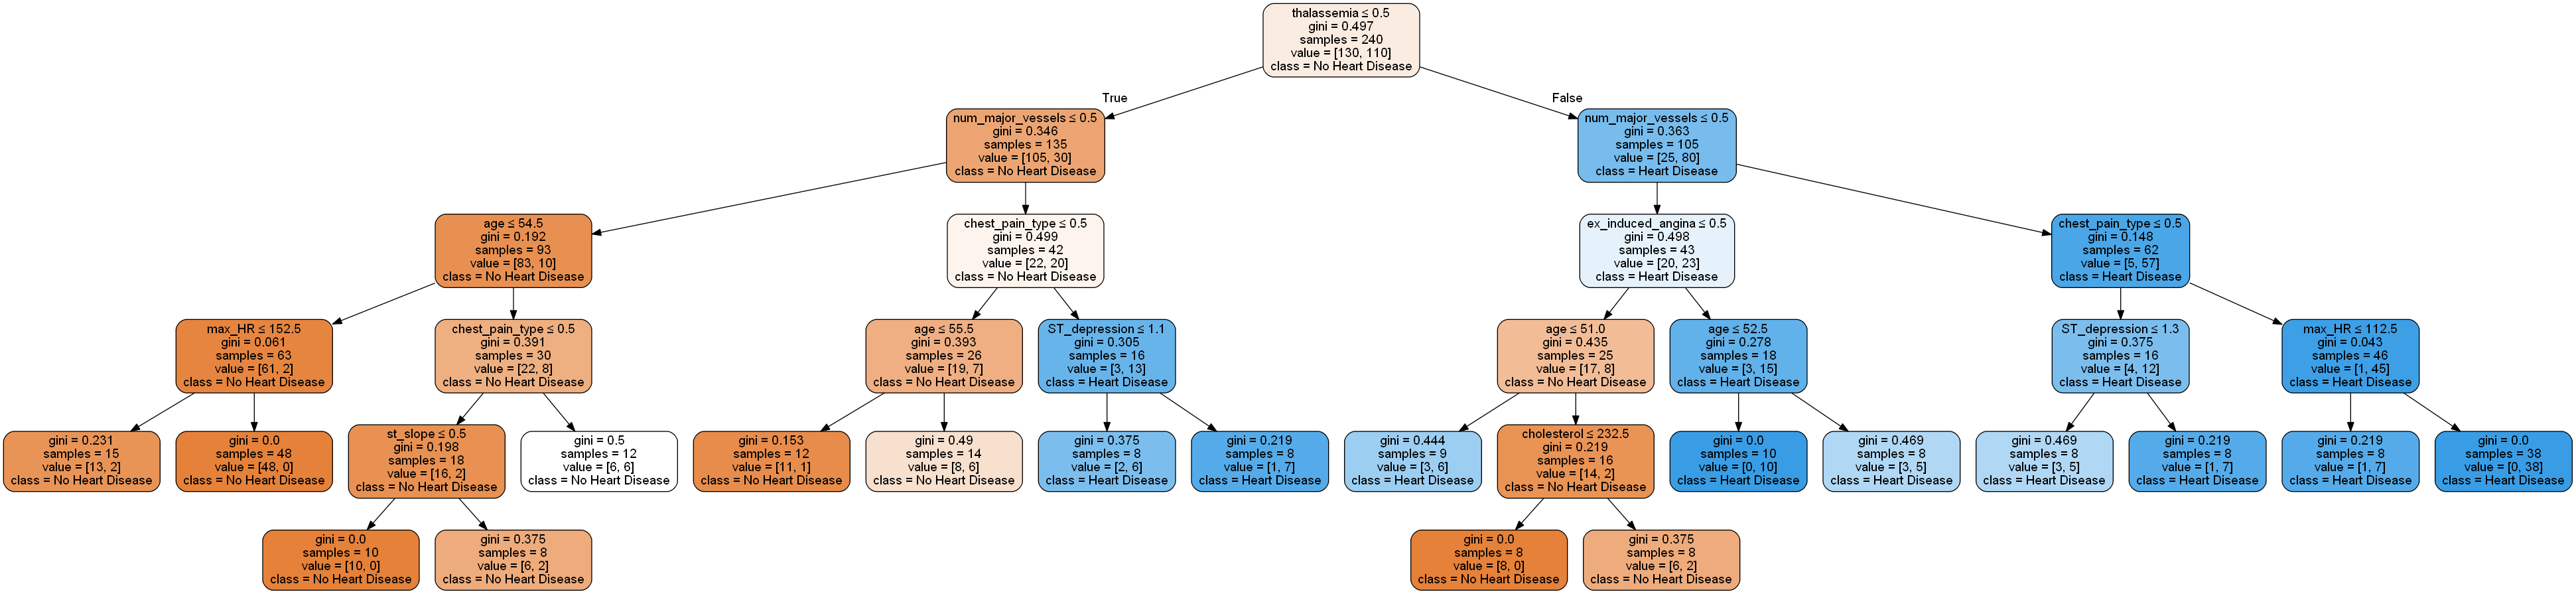

In [119]:
from sklearn.tree import export_graphviz 
import pydotplus
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\TeYan\AppData\Local\Continuum\anaconda3\pkgs\Graphviz2.38\bin'

#dt_target_names = [str(s) for s in y.unique()]
dot_data = export_graphviz(dt_clf.best_estimator_,
    feature_names=list(X_train.columns),
    class_names=['No Heart Disease', 'Heart Disease'],
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

According to the tree plot, thalassemia, which is an inherited blood disorder that causes your body to have less hemoglobin than normal, has the highest importance, followed by number of major blood vessels and type of chest pain.  

<a id='Ensemble'></a>
## **9. Ensemble Models** ##

<a id='Bagging'></a>
### **9.1 Bagging** ###

In [120]:
from sklearn.ensemble import BaggingClassifier

def bagging(X_train, X_test, y_train, y_test, param_grid, cv=10):
    clf = GridSearchCV(BaggingClassifier(LogisticRegression(penalty='l2', random_state=0),
                                            n_estimators = 100, n_jobs=-1, random_state=0),
                        param_grid, cv=cv, scoring='f1', return_train_score=True)
    clf.fit(X_train,y_train)
    print("Best parameters set found on Cross Validation:\n\n", clf.best_params_)
    print("\nCross Validation F1 score:\n\n", clf.best_score_.round(3))

    # predict test set  
    y_pred = clf.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}


# train L2 logistic regression bagging
param_grid = {
    'base_estimator__C': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100, 1000], # lambdas for regularization
    'max_samples': [0.05, 0.1, 0.2, 0.5], # for bootstrap sampling
    'max_features': [0.3,0.5,0.7,0.9]} 

scores = bagging(X_train_s, X_test_s, y_train, y_test, param_grid, cv=10) 
d = {'Model': 'Bagging L2 Log Regression'}
d.update(scores)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
scores

Best parameters set found on Cross Validation:

 {'base_estimator__C': 50, 'max_features': 0.9, 'max_samples': 0.2}

Cross Validation F1 score:

 0.83

Test set scores:


{'Accuracy': 0.867, 'Precision': 0.88, 'Recall': 0.815, 'F1': 0.846}

<a id='Forest'></a>
### **9.2 Random Forest** ###

In [121]:
from sklearn.ensemble import RandomForestClassifier

def randomforest(X_train, X_test, y_train, y_test, param_grid, cv=10):
    clf = GridSearchCV(RandomForestClassifier(n_estimators = 500, n_jobs=-1, random_state=0),
                        param_grid, cv=cv, scoring='f1', return_train_score=True)
    clf.fit(X_train,y_train)
    print("Best parameters set found on Cross Validation:\n\n", clf.best_params_)
    print("\nCross Validation F1 score:\n\n", clf.best_score_.round(3))    

    # predict test set  
    y_pred = clf.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}, clf 

# train random forest
param_grid = {
    'max_features': ['auto', 'sqrt'], # max number of features considered for splitting a node
    'max_depth': [5, 6, 7, 8], # max number of levels in each decision tree
    'min_samples_split': [2, 5, 10, 15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2, 5, 10]} # min number of data points allowed in a leaf node


scores, rf_clf = randomforest(X_train, X_test, y_train, y_test, param_grid, cv=10) 
d = {'Model': 'Random Forest'}
d.update(scores)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
scores

Best parameters set found on Cross Validation:

 {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}

Cross Validation F1 score:

 0.821

Test set scores:


{'Accuracy': 0.85, 'Precision': 0.846, 'Recall': 0.815, 'F1': 0.83}

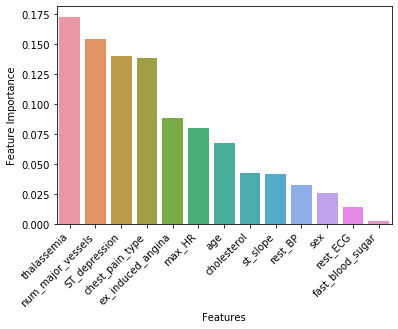

In [122]:
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf_clf.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(x='Features', y='Feature Importance', data=feat_imp)
plt.xticks(rotation=45, ha='right')
fig.show()

<a id='Boost'></a>
### **9.3 Gradient Boosting** ###

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

def boosting(X_train, X_test, y_train, y_test, param_grid, cv=10):
    clf = GridSearchCV(GradientBoostingClassifier(n_estimators = 100, learning_rate=0.01, subsample=0.8, random_state=0),
                        param_grid, cv=cv, scoring='f1', return_train_score=True)
    clf.fit(X_train,y_train)
    print("Best parameters set found on Cross Validation:\n\n", clf.best_params_)
    print("\nCross Validation F1 score:\n\n", clf.best_score_.round(3))        

    # predict test set  
    y_pred = clf.predict(X_test)
    print('\nTest set scores:')
    return {'Accuracy': accuracy_score(y_test, y_pred).round(3), 'Precision': precision_score(y_test, y_pred).round(3), 
        'Recall': recall_score(y_test, y_pred).round(3), 'F1': f1_score(y_test, y_pred).round(3)}, clf 

# train gradient boosting machine
param_grid = {
    'max_depth': [5, 6, 7, 8], # max number of levels in each decision tree
    'min_samples_split': [2, 5, 10, 15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2, 5, 10]} # min number of data points allowed in a leaf node


scores, gbm_clf = boosting(X_train, X_test, y_train, y_test, param_grid, cv=10) 
d = {'Model': 'Gradient Boosting'}
d.update(scores)
models_score = models_score.append(d, ignore_index=True) # add model scores to df
scores

Best parameters set found on Cross Validation:

 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

Cross Validation F1 score:

 0.791

Test set scores:


{'Accuracy': 0.817, 'Precision': 0.808, 'Recall': 0.778, 'F1': 0.792}

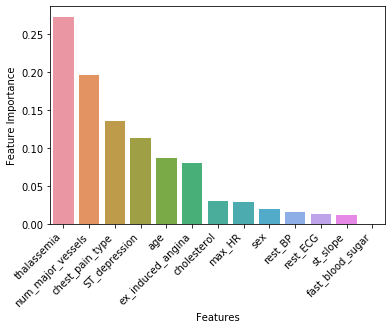

In [124]:
# Feature Importance
feat_imp = pd.DataFrame({'Features': x.columns, 'Feature Importance': gbm_clf.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(x='Features', y='Feature Importance', data=feat_imp)
plt.xticks(rotation=45, ha='right')
fig.show()

In [125]:
models_score

,Model,Accuracy,Precision,Recall,F1
0,L2 Log Regression,0.867,0.880,0.815,0.846
1,L1 Log Regression,0.867,0.880,0.815,0.846
2,KNN,0.817,0.864,0.704,0.776
3,SVM,0.867,0.880,0.815,0.846
4,Decision Tree,0.833,0.793,0.852,0.821
5,Bagging L2 Log Regression,0.867,0.880,0.815,0.846
6,Random Forest,0.850,0.846,0.815,0.830
7,Gradient Boosting,0.817,0.808,0.778,0.792


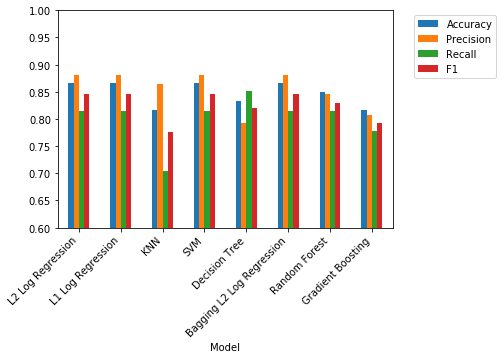

In [126]:
ax1 = models_score.plot(kind='bar', x='Model')
ax1.set_ylim(0.6,1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=45, ha='right')
fig.show()